In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from OceanLab import OA

In [147]:
x = Symbol('x')
y = Symbol('y')

amp = 1
L = 200
scalar = amp*sin(2*pi*x/L)*sin(2*pi*y/(0.5*L))
scalar

sin(pi*x/100)*sin(0.02*pi*y)

In [148]:
xi,yi = np.mgrid[0:100,0:100]

n = 300
np.random.seed(0)
ind = np.random.randint(0,xi.size-1,n)

iscalar = OA.scaloa(xi.ravel(),yi.ravel(),
          xi.ravel()[ind],
          yi.ravel()[ind],
          lambdify((x,y),scalar)(xi,yi).ravel()[ind],
          L,L/2,0.001)[0].reshape(xi.shape)

u = -Derivative(scalar,y).doit()
v = Derivative(scalar,x).doit()

ui = lambdify((x,y),u)(xi,yi)
vi = lambdify((x,y),v)(xi,yi)

iscalar2 = OA.vectoa(xi,yi,
          xi.ravel()[ind],yi.ravel()[ind],
          ui.ravel()[ind],vi.ravel()[ind],
          L,L/2,0.001)
iscalar2 = iscalar2-iscalar2.mean()+lambdify((x,y),scalar)(xi,yi).mean()

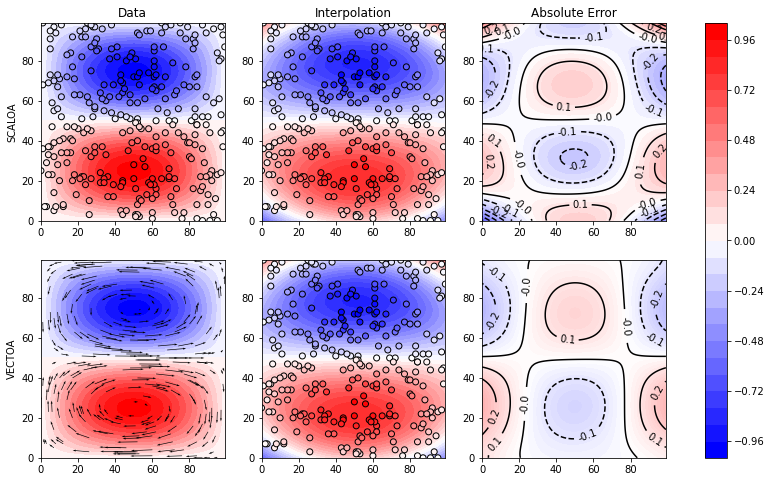

In [151]:
kw = {
    'contourf':{
        'vmin':-amp,
        'vmax':amp,
        'levels':30,
        'cmap':'bwr',
    },
    'contour':{
        'levels':np.arange(-amp,amp+0.1,0.1),
        'colors':'k',
    },
    'scatter':{
        'vmin':-amp,
        'vmax':amp,
        'edgecolor':'k',
        'cmap':'bwr',
    },
    'quiver':{
        'scale':0.5,
    },
}

fig,ax = plt.subplots(2,3,figsize=(14,8))

C = ax[0,0].contourf(xi,yi,lambdify((x,y),scalar)(xi,yi),**kw['contourf'])
ax[0,0].scatter(xi.ravel()[ind],yi.ravel()[ind],c=lambdify((x,y),scalar)(xi,yi).ravel()[ind],**kw['scatter'])

ax[0,1].contourf(xi,yi,iscalar,**kw['contourf'])
ax[0,1].scatter(xi.ravel()[ind],yi.ravel()[ind],c=lambdify((x,y),scalar)(xi,yi).ravel()[ind],**kw['scatter'])

ax[0,2].contourf(xi,yi,iscalar-lambdify((x,y),scalar)(xi,yi),**kw['contourf'])
Ct = ax[0,2].contour(xi,yi,iscalar-lambdify((x,y),scalar)(xi,yi),**kw['contour'])
plt.clabel(Ct,fmt='%.1f')

C = ax[1,0].contourf(xi,yi,lambdify((x,y),scalar)(xi,yi),**kw['contourf'])
ax[1,0].quiver(xi.ravel()[ind],yi.ravel()[ind],ui.ravel()[ind],vi.ravel()[ind],**kw['quiver'])


ax[1,1].contourf(xi,yi,iscalar,**kw['contourf'])
ax[1,1].scatter(xi.ravel()[ind],yi.ravel()[ind],c=lambdify((x,y),scalar)(xi,yi).ravel()[ind],**kw['scatter'])

ax[1,2].contourf(xi,yi,iscalar2-lambdify((x,y),scalar)(xi,yi),**kw['contourf'])
Ct = ax[1,2].contour(xi,yi,iscalar2-lambdify((x,y),scalar)(xi,yi),**kw['contour'])
plt.clabel(Ct,fmt='%.1f')

fig.colorbar(C,ax=ax)

_ = ax[0,0].set(title='Data')
_ = ax[0,1].set(title='Interpolation')
_ = ax[0,2].set(title='Absolute Error')

_ = ax[0,0].set(ylabel='SCALOA')
_ = ax[1,0].set(ylabel='VECTOA')